## Task 3: IRIS FLOWER CLASSIFICATION

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Loading Dataset

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Information of Dataset columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Calculating statical values 



In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking null values in the dataset

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

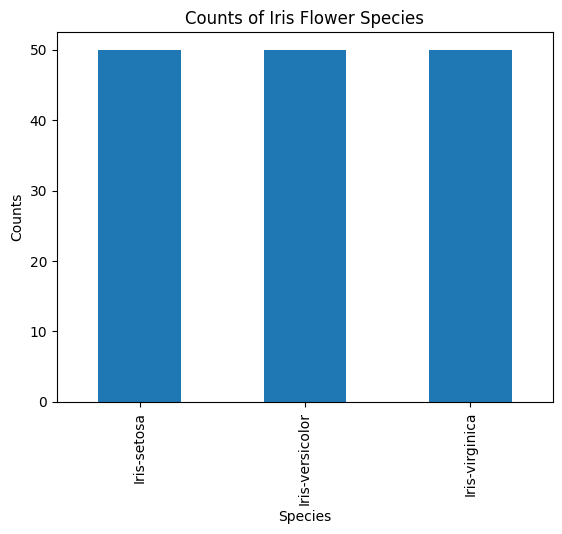

In [6]:
df['species'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Counts')
plt.title('Counts of Iris Flower Species')
plt.show()

In [7]:
df.shape


(150, 5)

##### Data Wrangling / preprocessing 

Checking the species of flower using species column

In [8]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can see we have Three Species of the Iris Flower

We have to convert the categorical data into numerical processing 

In [9]:
df['species'] =df['species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2,}.get)

In [10]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0


In [11]:
df.tail(2)


,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Data visualization

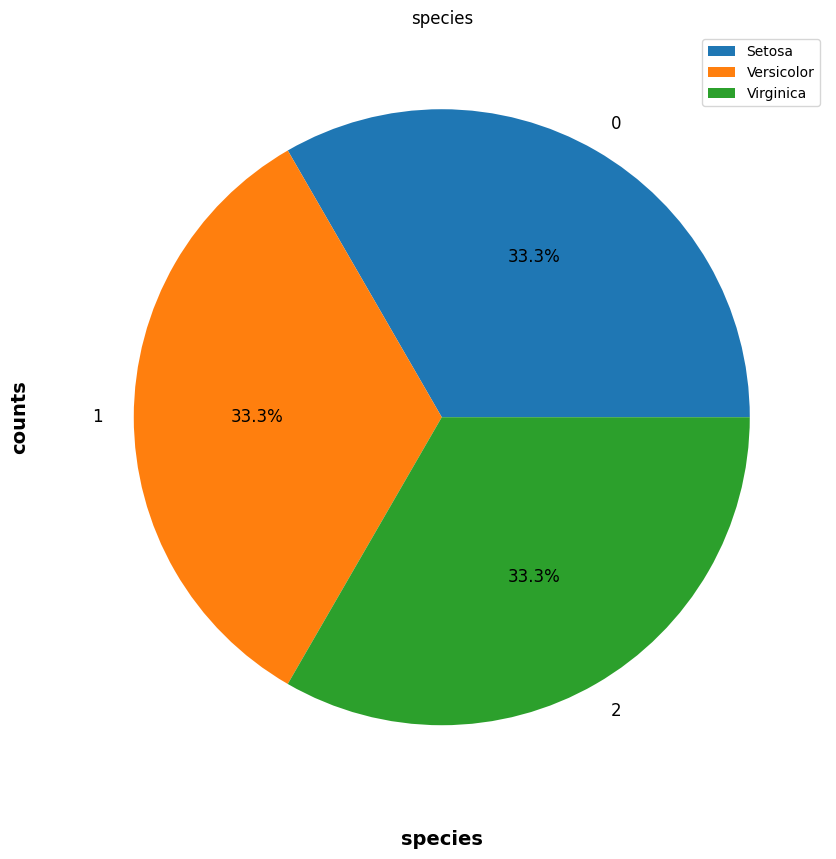

In [13]:
plt.figure(figsize = (20, 10))
explode = (0,0,0.09)
count_iris = df['species'].value_counts()
count_iris.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%')
plt.title('species')
plt.xlabel('species', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels  = ['Setosa','Versicolor','Virginica'])
plt.show()

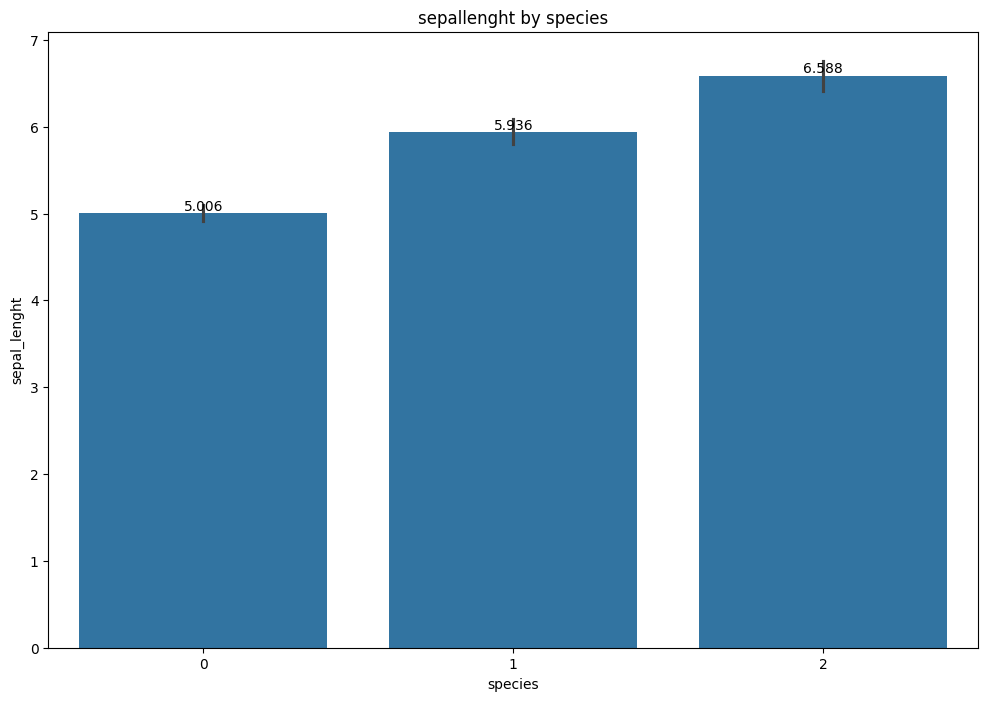

In [14]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df['species'],y=df['sepal_length'])
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('sepallenght by species')
plt.xlabel('species')
plt.ylabel('sepal_lenght')
plt.show()

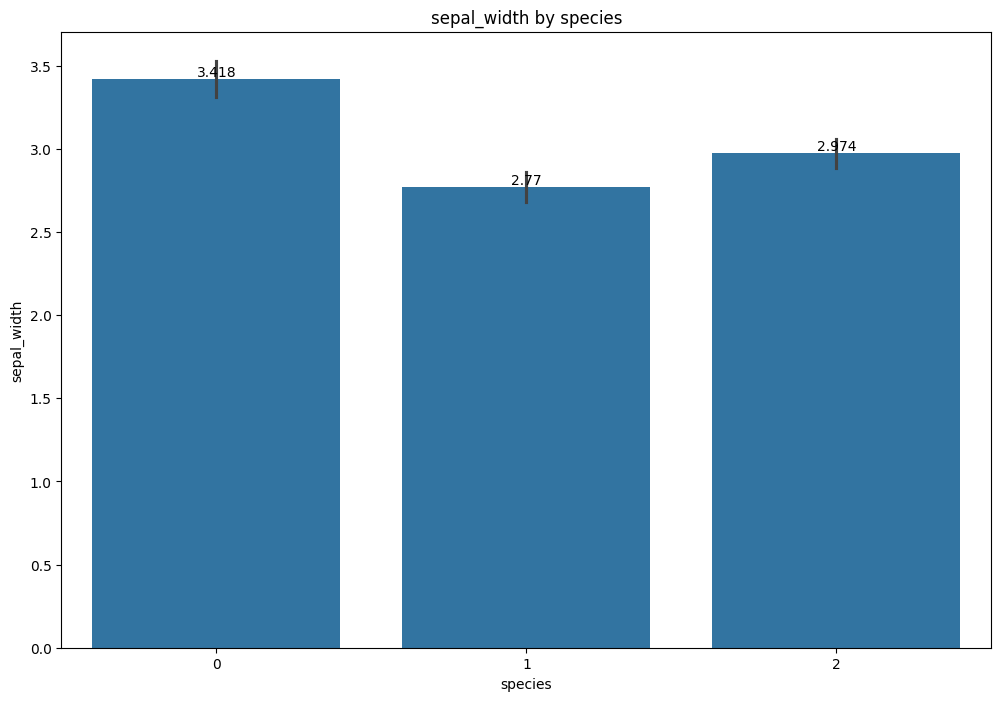

In [15]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df['species'],y=df['sepal_width'])
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('sepal_width by species')
plt.xlabel('species')
plt.ylabel('sepal_width')
plt.show()

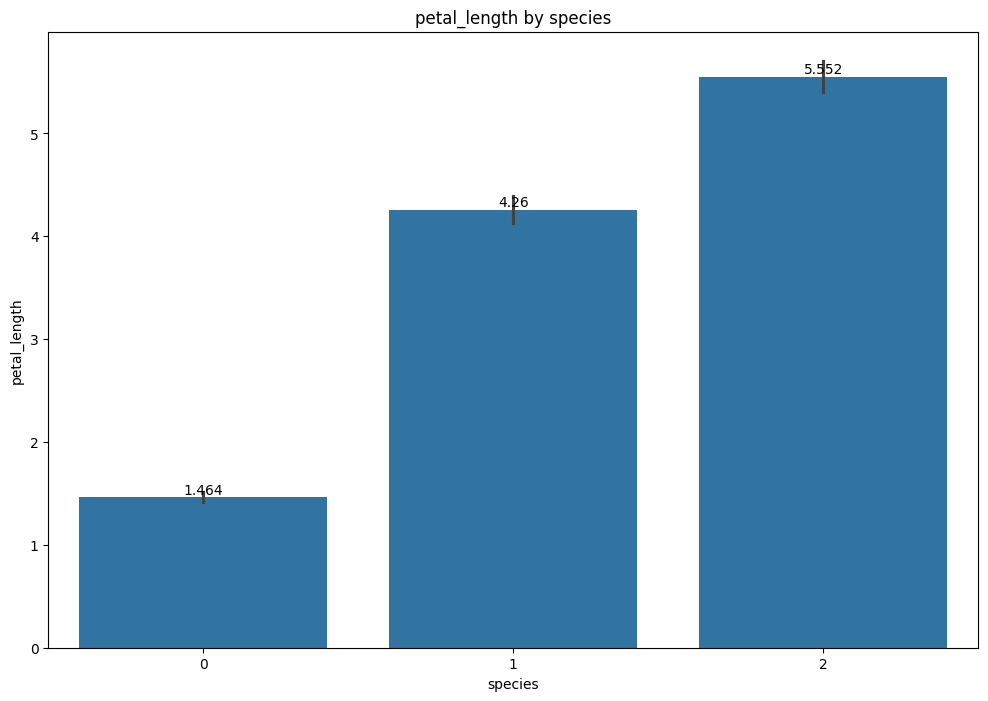

In [16]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df['species'],y=df['petal_length'])
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('petal_length by species')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.show()

<h1>Preparing Dataset for Model Development
</h1>

Dividing data into dependent and independent variables

In [17]:
x = df.drop(['species'],axis=1)
y = df['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

<h3>Dividing data into training and testing sets for further processing</h3>

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

# Model Development


### 1. DecisionTreeClassification

In [20]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [21]:
Tree = DecisionTreeClassifier()

In [22]:
# Trainin the data
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
# Predicting the classification of flower
Classification1 = Tree.predict(x_test)
print(Classification1)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


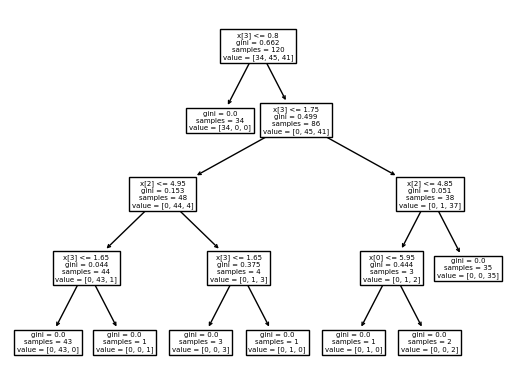

In [24]:
tree.plot_tree(Tree)
plt.show()

##### Evaluation of Model

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
accuracyScore = accuracy_score(y_test,Classification1)
conMatrix = confusion_matrix(y_test,Classification1)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Classification1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



In [28]:
conMatrix

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

In [29]:
print('The accuracy of the model is {:.2f}%.'.format(accuracyScore*100))

The accuracy of the model is 96.67%.


### 2. LogisticRegression Classification Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
regression = LogisticRegression(multi_class = 'multinomial',solver='lbfgs')


In [32]:
regression.fit(x_train,y_train)


/home/suresh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [33]:
Classification2 = regression.predict(x_test)

In [34]:
Classification2

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

Evaluation using jaccard-score

In [35]:
accuracy1 = accuracy_score(y_test,Classification1)
print('The Model is {:.2f}% accurate.'.format(accuracy1*100))

The Model is 96.67% accurate.


### 3. RandomForestClassifier Classification Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [37]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
ClassPrediction = forest.predict(x_test)

In [39]:
print(ClassPrediction)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


Model evaluation

In [40]:
accuracyScore3 = accuracy_score(y_test,ClassPrediction)
conMatrix3 = confusion_matrix(y_test,ClassPrediction) 

In [41]:
print(conMatrix3)

[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


In [42]:
print("The accuracy of the RandomRorestClassifier is {:.2f}%.".format(accuracyScore3*100))

The accuracy of the RandomRorestClassifier is 96.67%.


### 4. KNeighbourClassifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors = 4)

Fitting the data


In [48]:
neighbor.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [51]:
predict = neighbor.predict(x_test)
print(predict)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


Evaluation of the model

In [52]:
print(accuracy_score(y_test,predict))

0.9666666666666667


## Conclusions

From the above classification machine learning algorithe we can see the all of the accuracy score is same.
so we can use any of them to predict the classification of the new Data.

## Author 
#### Suresh Tamang
